In [2]:
import matplotlib.pyplot as plt
import os
from PIL import Image
def plot_sampled_epoch_images(output_dir, sample_interval=5, images_per_epoch=10,total_epoch=50):
    sampled_epochs = range(0, total_epoch, sample_interval) 
    fig, axes = plt.subplots(len(sampled_epochs), images_per_epoch, figsize=(images_per_epoch * 2, len(sampled_epochs) * 2))
    
    for i, epoch in enumerate(sampled_epochs):
        epoch_dir = os.path.join(output_dir, f"epoch_{epoch}")
        if not os.path.exists(epoch_dir):
            continue
        
        images = sorted(os.listdir(epoch_dir))[:images_per_epoch]
        for j, img_file in enumerate(images):
            img_path = os.path.join(epoch_dir, img_file)
            if os.path.exists(img_path):
                img = Image.open(img_path)
                axes[i, j].imshow(img)
                axes[i, j].axis('off')
                if j == 0:
                    axes[i, j].set_ylabel(f"Epoch {epoch}", fontsize=12)
    for ax, col in zip(axes[0], range(1, images_per_epoch + 1)):
        ax.set_title(f"Image {col}", fontsize=10)
    for ay, row in zip(axes[:,0],range(1, 100,10)):
        ay.set_title(f"Epoch {row}", fontsize=10)
    fig.text(0.5, 0.04, "Image Number", ha="center", fontsize=14) 
    fig.text(0.04, 0.5, "Epoch (Sampled)", va="center", rotation="vertical", fontsize=14)

    plt.tight_layout(rect=[0.05, 0.05, 1, 1]) 
    plt.show()

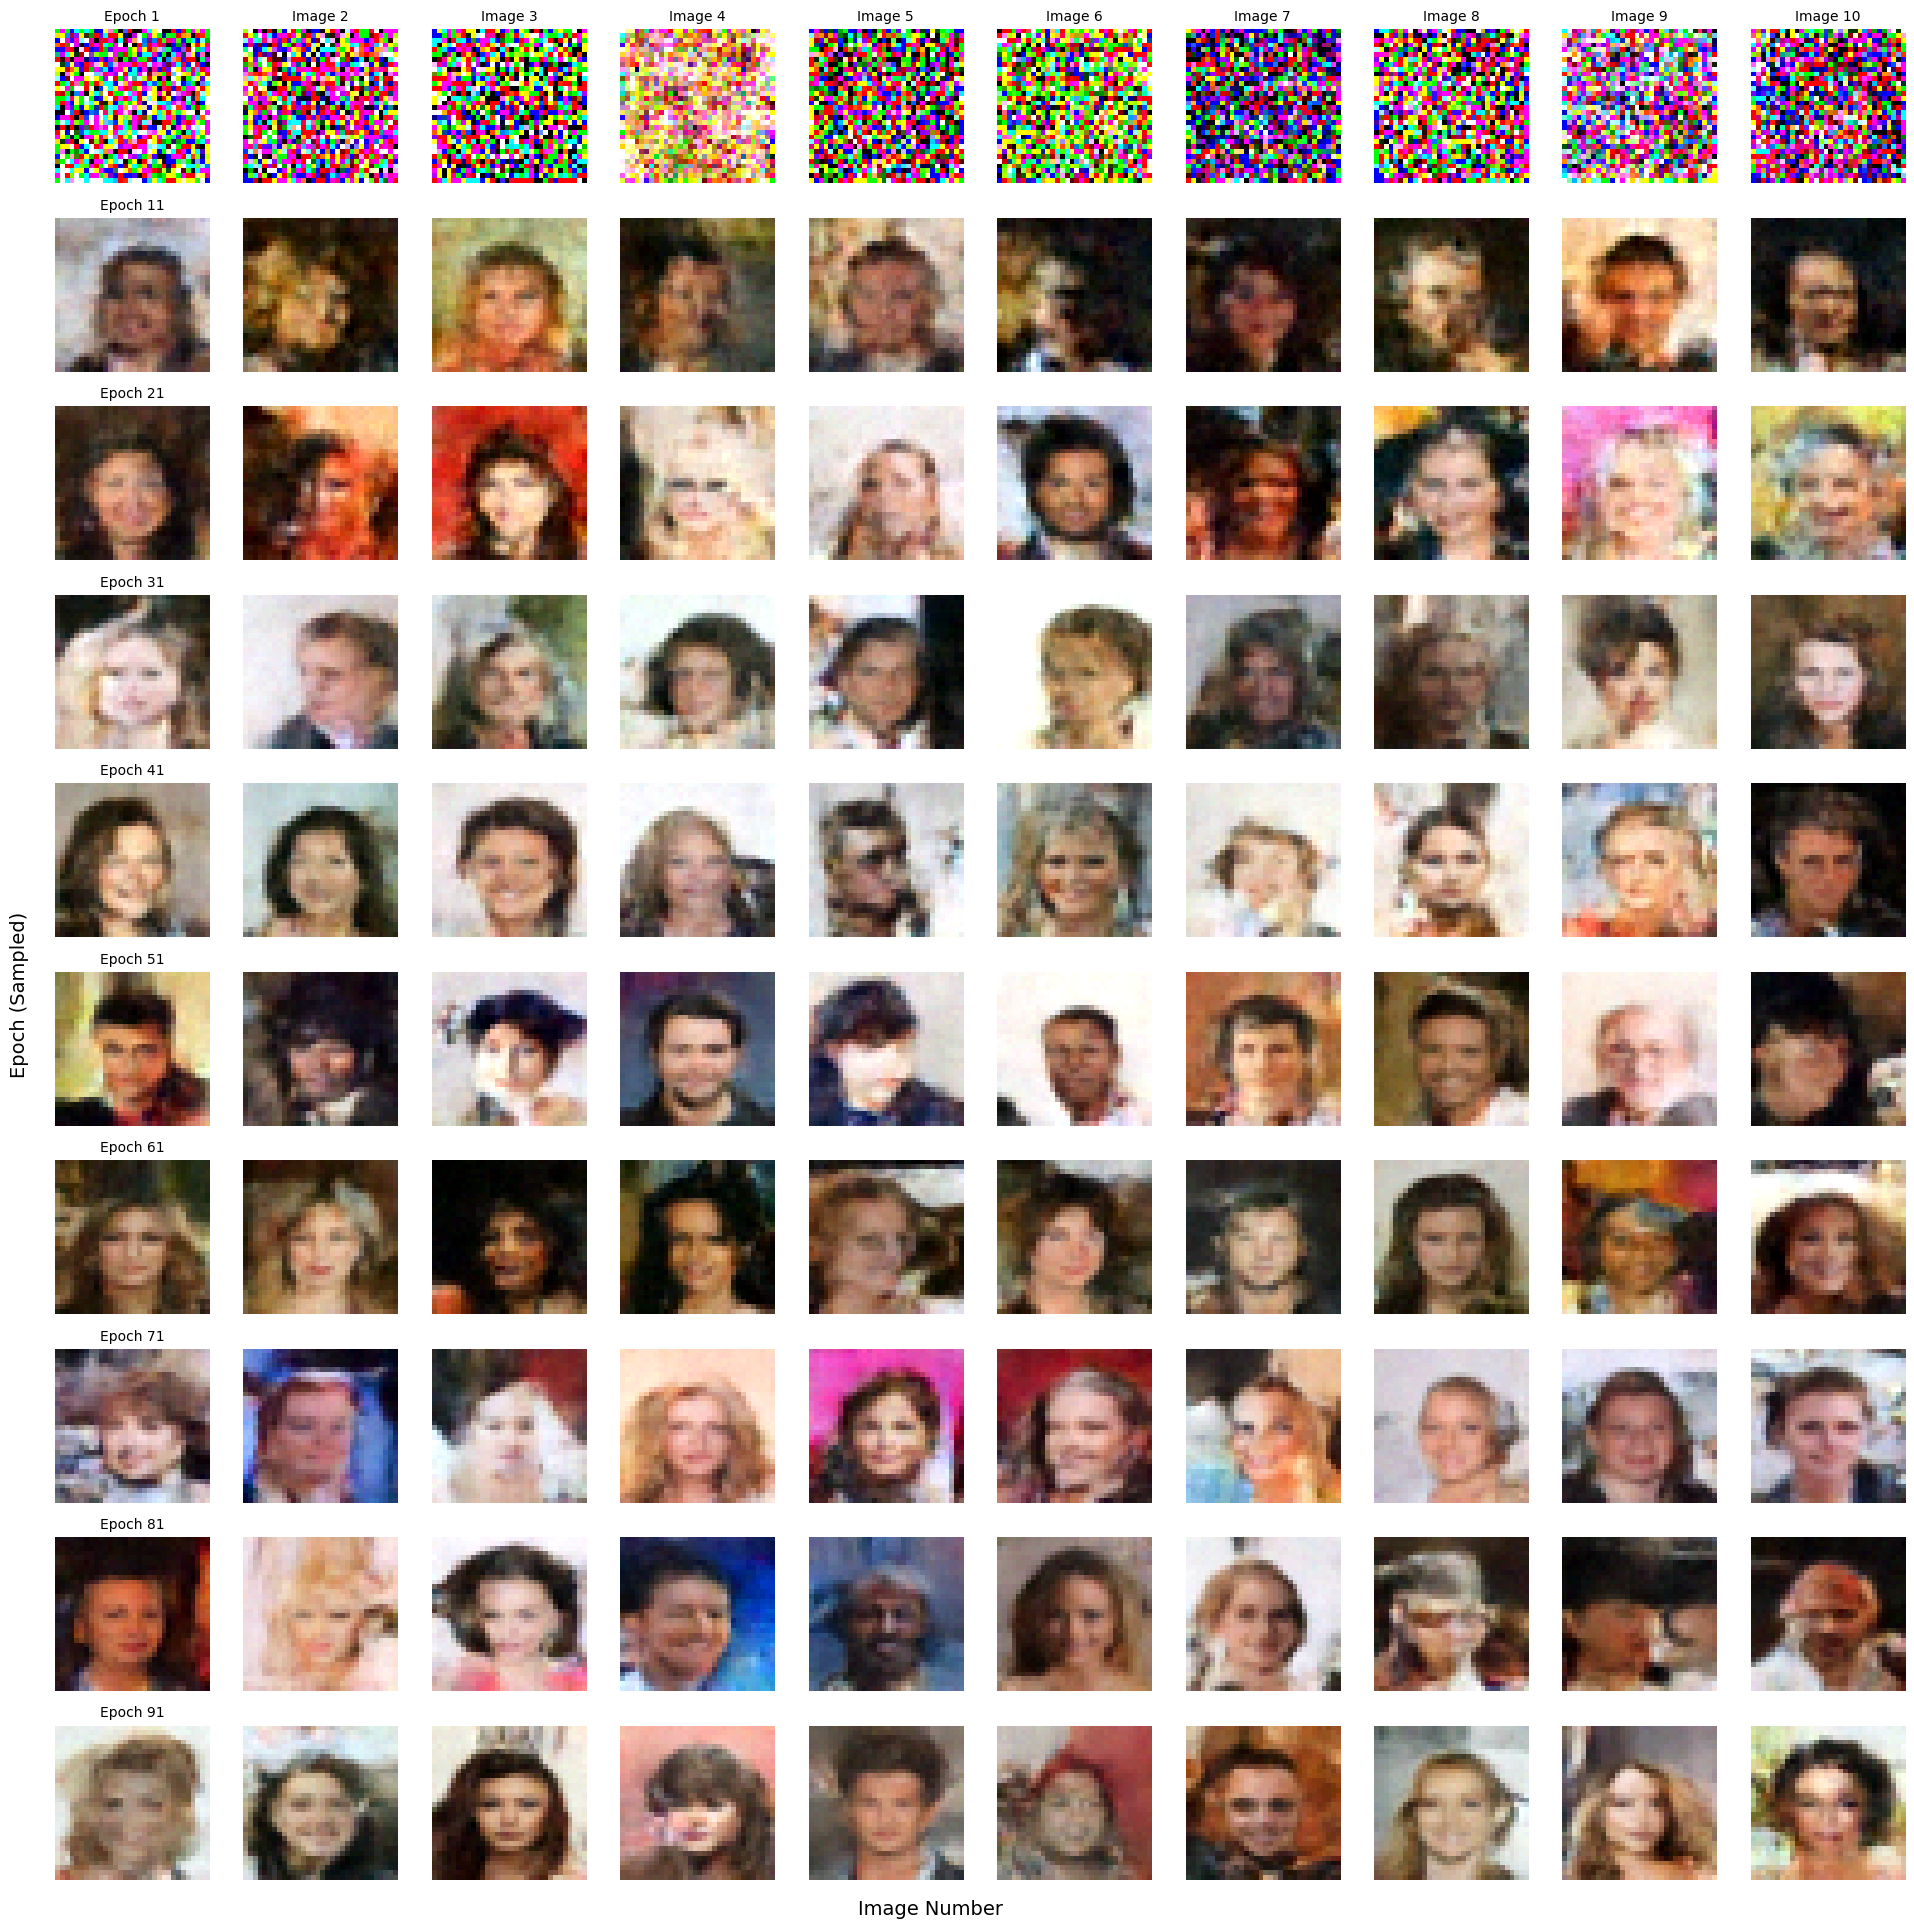

In [3]:
output_directory = "outputs\CelebA"
plot_sampled_epoch_images(output_directory)

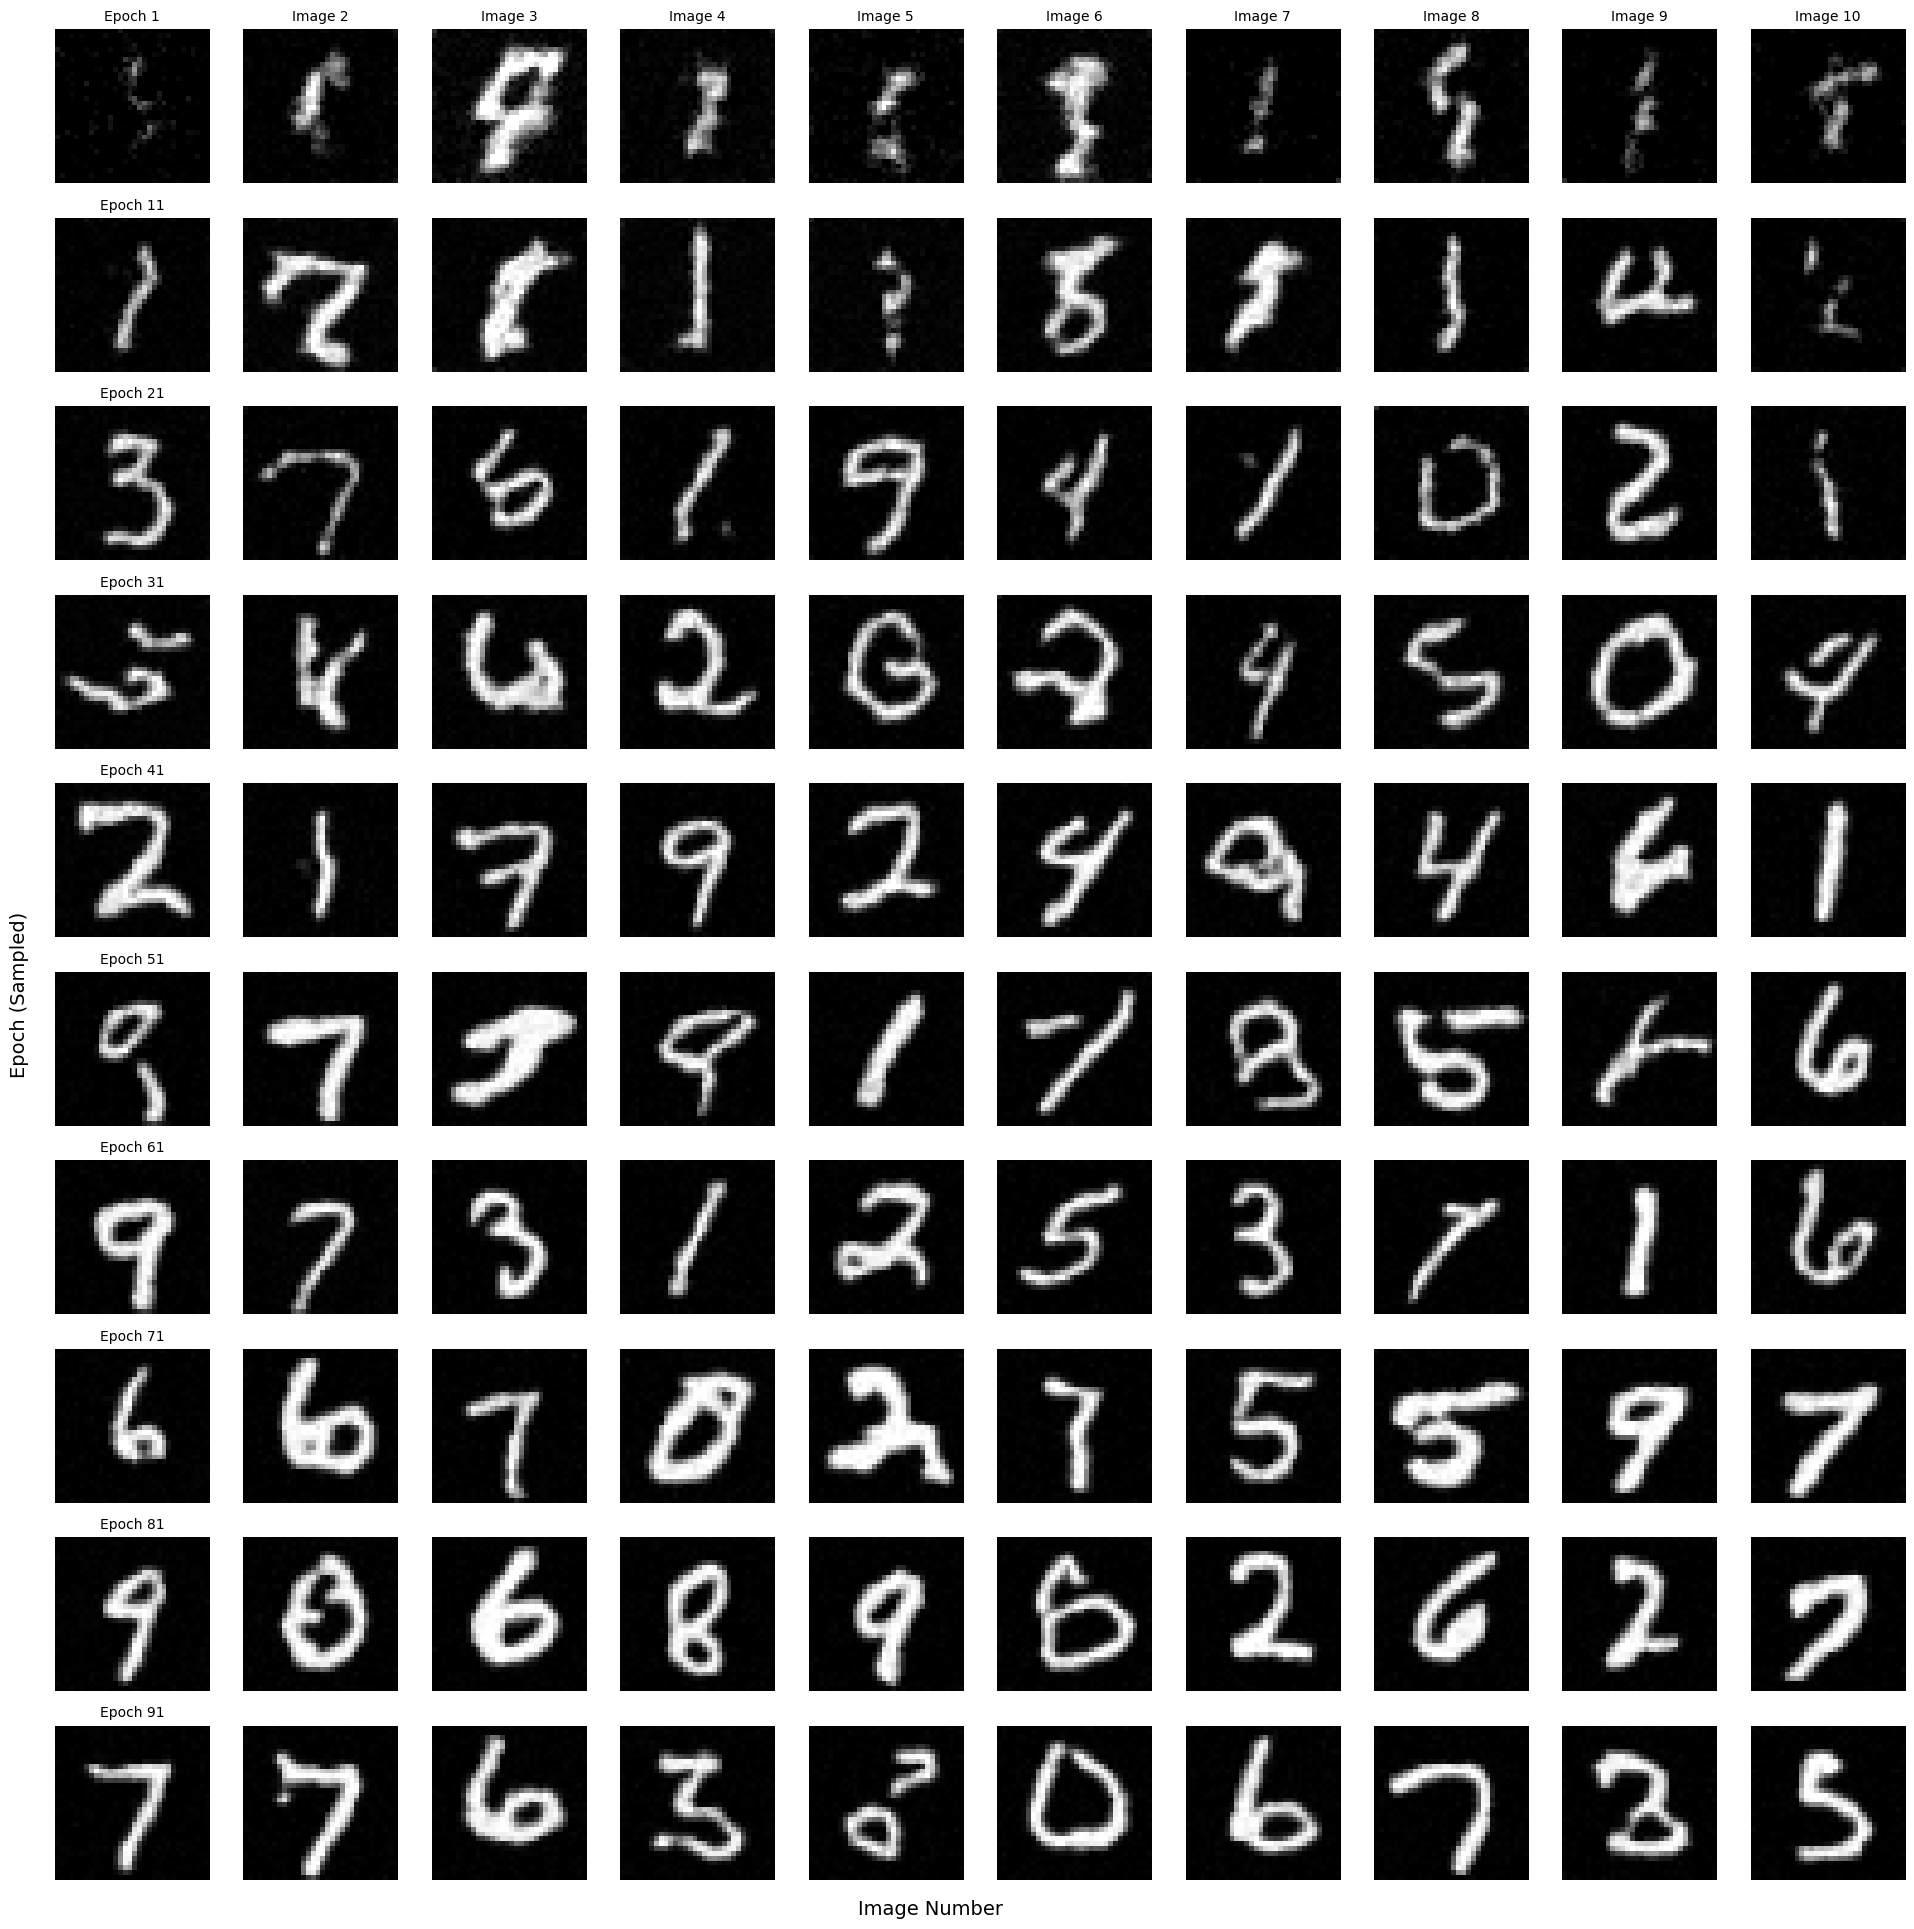

In [4]:
output_directory = "outputs\mnist"
plot_sampled_epoch_images(output_directory,sample_interval=1,total_epoch=10)